In [1]:
# -------------------------------------------
# 🌍 AIR QUALITY INDEX (AQI) PREDICTION PROJECT
# with Full EDA + Visualization + Random Forest
# (no functions, no loops)
# -------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 🧾 Load Dataset
data = pd.read_csv("data_date.csv")

In [3]:
# 🧹 Clean Data
data = data.drop(["Date"], axis=1)

In [4]:
# 🔠 Encode Categorical Data
encoder_country = LabelEncoder()
encoder_status = LabelEncoder()
data["Country"] = encoder_country.fit_transform(data["Country"])
data["Status"] = encoder_status.fit_transform(data["Status"])


In [5]:
# 🎯 Features and Target
X = data.drop("AQI Value", axis=1)
y = data["AQI Value"]

In [6]:
# 🧩 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# ⚖️ Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 🌲 Train Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [9]:
# 🔮 Predictions
y_pred = model.predict(X_test)


In [10]:
# 📈 Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("🎯 MODEL PERFORMANCE")
print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

🎯 MODEL PERFORMANCE
R² Score: 0.902
MAE: 9.2
RMSE: 15.85


In [11]:
# ---------------------------------------------------
# 🎨 Visualization Section
# ---------------------------------------------------

# 🌈 Set Color Theme
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

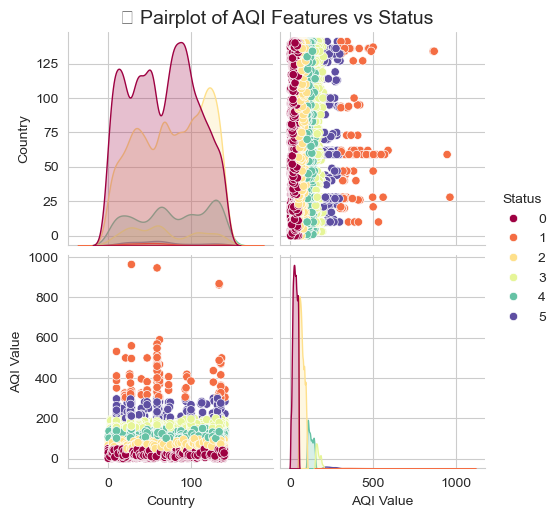

In [12]:
# 🔹 Pairplot for Feature Relationships
sns.pairplot(data, hue="Status", palette="Spectral")
plt.suptitle("🌈 Pairplot of AQI Features vs Status", fontsize=14, y=1.02)
plt.show()


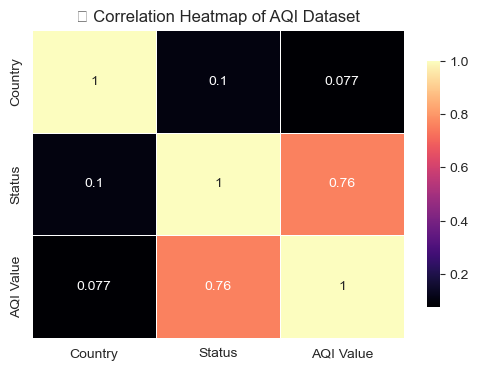

In [13]:
# 🔹 Heatmap for Correlation
plt.figure(figsize=(6, 4))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="magma", linewidths=0.6, cbar_kws={'shrink': 0.8})
plt.title("🔥 Correlation Heatmap of AQI Dataset")
plt.show()

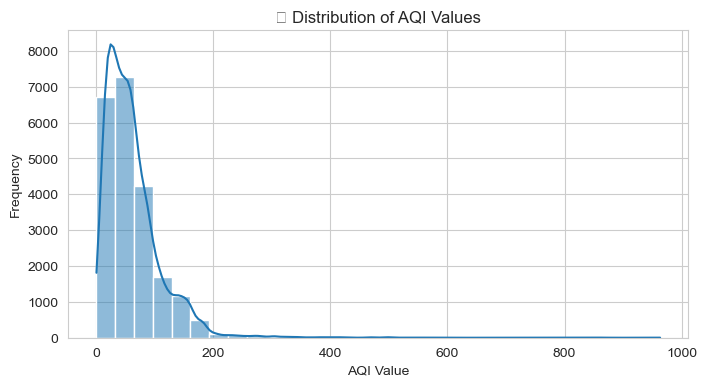

In [14]:
# 🔹 Distribution of AQI Values
plt.figure(figsize=(8, 4))
sns.histplot(y, bins=30, kde=True, color="#1f77b4")
plt.title("📊 Distribution of AQI Values")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()


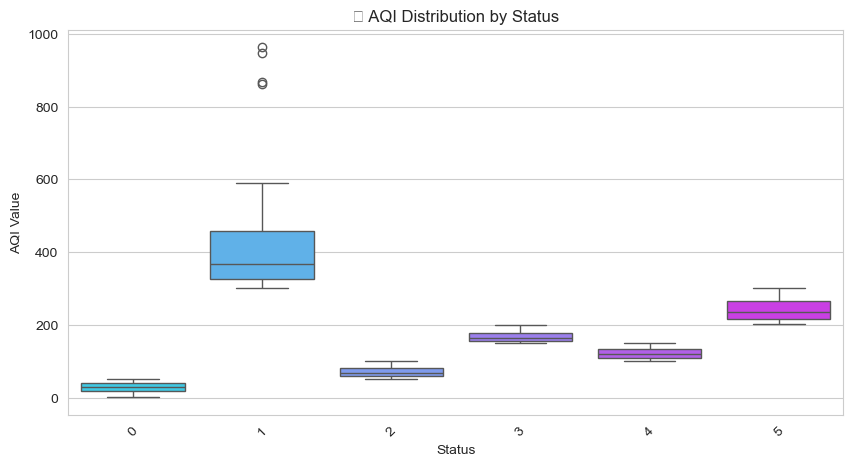

In [15]:
# 🔹 Boxplot: AQI by Status
plt.figure(figsize=(10, 5))
sns.boxplot(x="Status", y="AQI Value", data=data, palette="cool")
plt.title("📦 AQI Distribution by Status")
plt.xticks(rotation=45)
plt.show()

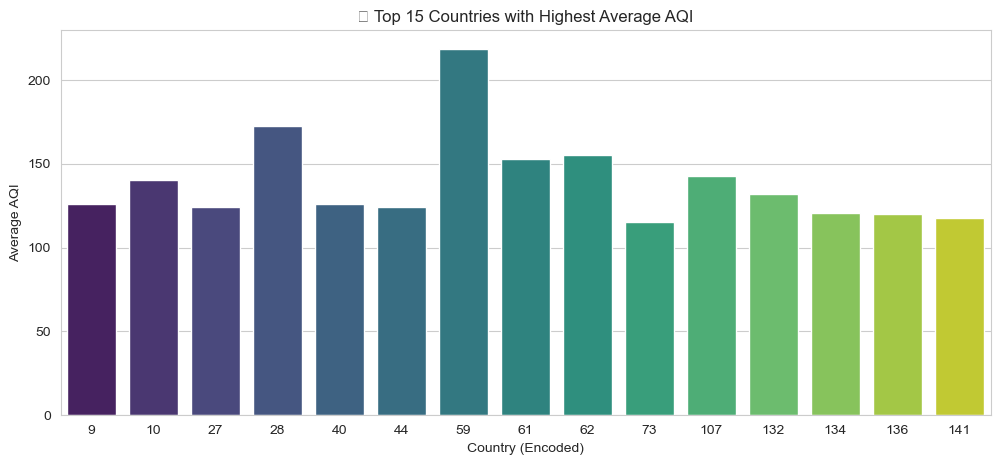

In [16]:
# 🔹 Barplot: Average AQI by Country
plt.figure(figsize=(12, 5))
avg_aqi = data.groupby("Country")["AQI Value"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_aqi.index, y=avg_aqi.values, palette="viridis")
plt.title("🌍 Top 15 Countries with Highest Average AQI")
plt.xlabel("Country (Encoded)")
plt.ylabel("Average AQI")
plt.show()


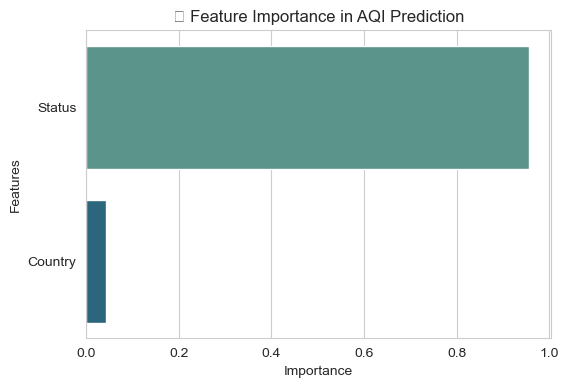

In [17]:
# 🔹 Feature Importance Visualization
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="crest")
plt.title("🌲 Feature Importance in AQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


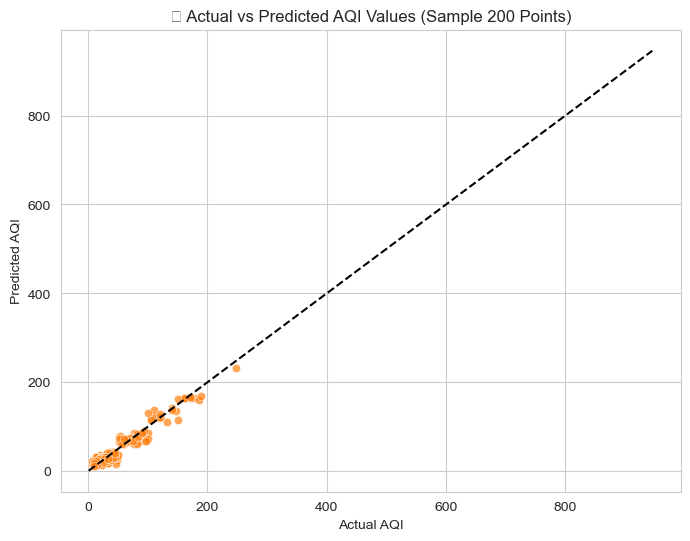

In [18]:

# 🔹 Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test[:200], y=y_pred[:200], alpha=0.7, color="#ff7f0e")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.title("🔍 Actual vs Predicted AQI Values (Sample 200 Points)")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.show()

# ---------------------------------------------------
# 🎉 END
# ---------------------------------------------------


In [19]:
import pickle

In [20]:
with open("aqi_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [21]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

In [22]:
import pandas as pd

data = pd.read_csv("data_date.csv")  # put your dataset file name here
print(data.columns)


Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')


In [23]:


# Load your scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print("✅ Features used in scaler:")
print(list(scaler.feature_names_in_))


✅ Features used in scaler:
['Country', 'Status']


In [24]:
# -------------------------------
# Label Encoding for AQI dataset
# -------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Load your dataset
data = pd.read_csv("data_date.csv")

# Initialize encoders
country_encoder = LabelEncoder()
status_encoder = LabelEncoder()

# Fit + transform your columns
data['Country'] = country_encoder.fit_transform(data['Country'])
data['Status'] = status_encoder.fit_transform(data['Status'])

# Show results
print("Encoded sample:")
print(data.head())

# Save encoders for later (Streamlit or other apps)
with open("country_encoder.pkl", "wb") as f:
    pickle.dump(country_encoder, f)

with open("status_encoder.pkl", "wb") as f:
    pickle.dump(status_encoder, f)

print("\n✅ Encoders saved as 'country_encoder.pkl' and 'status_encoder.pkl'")


Encoded sample:
         Date  Country  Status  AQI Value
0  2022-07-21        0       0         14
1  2022-07-21        1       2         65
2  2022-07-21        2       2         55
3  2022-07-21        3       4        113
4  2022-07-21        4       2         63

✅ Encoders saved as 'country_encoder.pkl' and 'status_encoder.pkl'
